#Getting The Data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import xgboost as xgb

# Load the dataset
playlist_songs = pd.read_csv('/content/spotifyfulldataset.csv', encoding='latin1')

# Extract feature names (adjust column indices if necessary)
feature_names = playlist_songs.columns[11:23]

# View the structure of the dataset
display(playlist_songs.info())
display(playlist_songs.describe())
display(playlist_songs.head())

# Custom function to display DataFrame structure similar to glimpse
def glimpse(df):
    display(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    for col in df.columns:
        display(f"{col}: {df[col].dtype}")

# Apply the custom glimpse function
glimpse(playlist_songs)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

None

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


'Rows: 32833, Columns: 23'

'track_id: object'

'track_name: object'

'track_artist: object'

'track_popularity: int64'

'track_album_id: object'

'track_album_name: object'

'track_album_release_date: object'

'playlist_name: object'

'playlist_id: object'

'playlist_genre: object'

'playlist_subgenre: object'

'danceability: float64'

'energy: float64'

'key: int64'

'loudness: float64'

'mode: int64'

'speechiness: float64'

'acousticness: float64'

'instrumentalness: float64'

'liveness: float64'

'valence: float64'

'tempo: float64'

'duration_ms: int64'

In [ ]:
from tabulate import tabulate

# Count the occurrences of each genre
genre_counts = playlist_songs['playlist_genre'].value_counts().reset_index()
genre_counts.columns = ['playlist_genre', 'count']

# Display the table in a format similar to knitr::kable()
print(tabulate(genre_counts, headers='keys', tablefmt='pipe', showindex=False))


| playlist_genre   |   count |
|:-----------------|--------:|
| edm              |    6043 |
| rap              |    5746 |
| pop              |    5507 |
| r&b              |    5431 |
| latin            |    5155 |
| rock             |    4951 |


#Exploring Audio Features by Genre

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


"Feature names: Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',\n       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',\n       'duration_ms'],\n      dtype='object')"

,playlist_genre,feature,value
0,pop,danceability,0.748
1,pop,danceability,0.726
2,pop,danceability,0.675
3,pop,danceability,0.718
4,pop,danceability,0.650


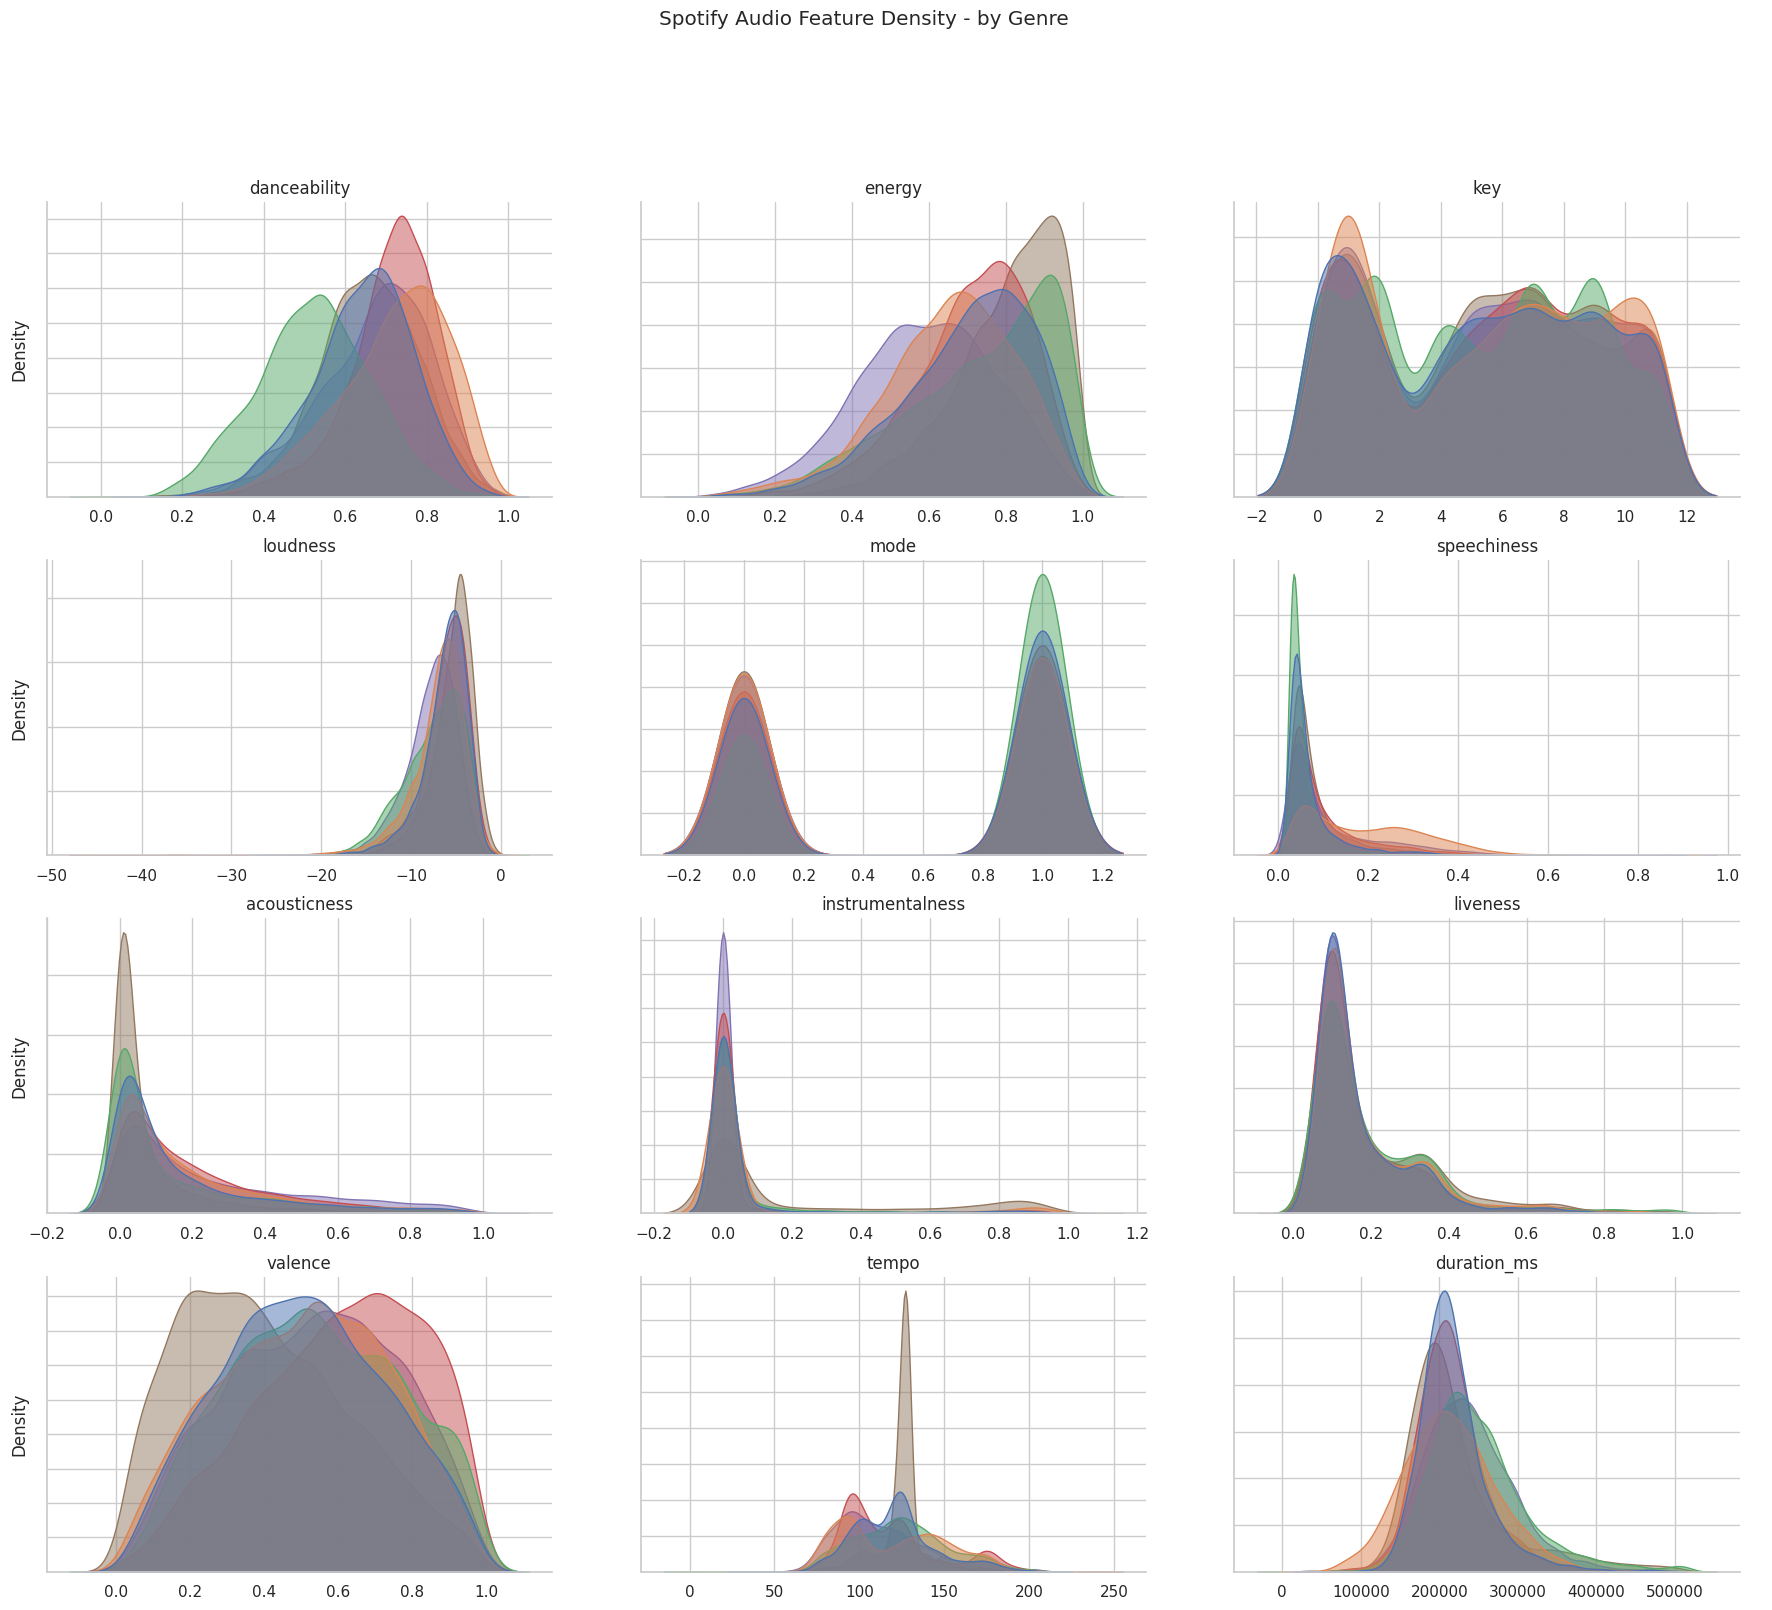

In [ ]:
# Check the first few rows of the dataset to ensure it's loaded correctly
display(playlist_songs.head())

# Extract feature names
feature_names = playlist_songs.columns[11:23]
display(f"Feature names: {feature_names}")

# Select the relevant columns and reshape the dataframe
df_long = pd.melt(playlist_songs, id_vars=['playlist_genre'], value_vars=feature_names, var_name='feature', value_name='value')

# Filter out non-numeric values from the 'value' column
df_long_numeric = df_long[pd.to_numeric(df_long['value'], errors='coerce').notna()]

# Display the first few rows of the new dataframe to ensure it has the correct data
display(df_long_numeric.head())

# Set up the seaborn style
sns.set(style="whitegrid")

# Create the density plots
g = sns.FacetGrid(df_long_numeric, col='feature', col_wrap=3, sharex=False, sharey=False, height=4, aspect=1.5)
g.map_dataframe(sns.kdeplot, x='value', hue='playlist_genre', fill=True, common_norm=False, alpha=0.5)
g.add_legend()

# Add titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('', 'Density')
g.fig.suptitle('Spotify Audio Feature Density - by Genre', y=1.02)

# Define colors for each genre
palette = sns.color_palette("husl", len(df_long_numeric['playlist_genre'].unique()))
colors = dict(zip(df_long_numeric['playlist_genre'].unique(), palette))

# Add color information to each subplot
for ax in g.axes.flatten():
    handles, labels = ax.get_legend_handles_labels()
    for handle, label in zip(handles, labels):
        color = colors[label]
        ax.annotate(f'{label}: {color}', xy=(0.95, 0.95), xycoords='axes fraction',
                    fontsize=10, ha='right', color=color, weight='bold', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Remove y-axis text
for ax in g.axes.flatten():
    ax.yaxis.set_ticklabels([])

# Adjust layout
plt.subplots_adjust(top=0.9)
plt.show()


#Removing Outliers

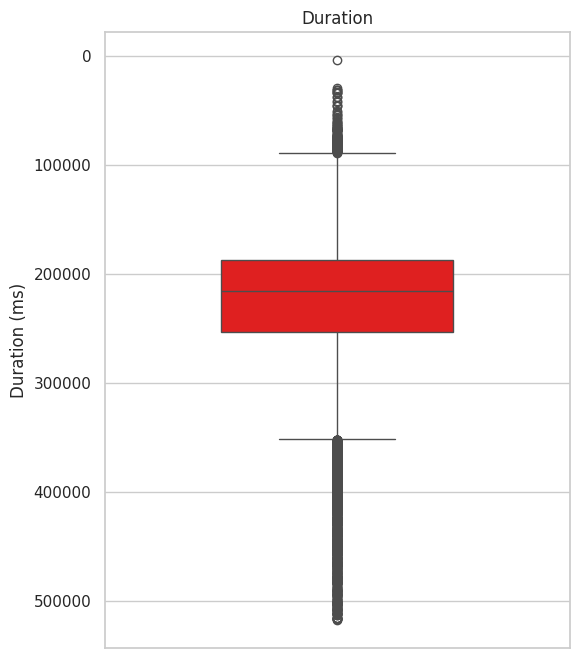

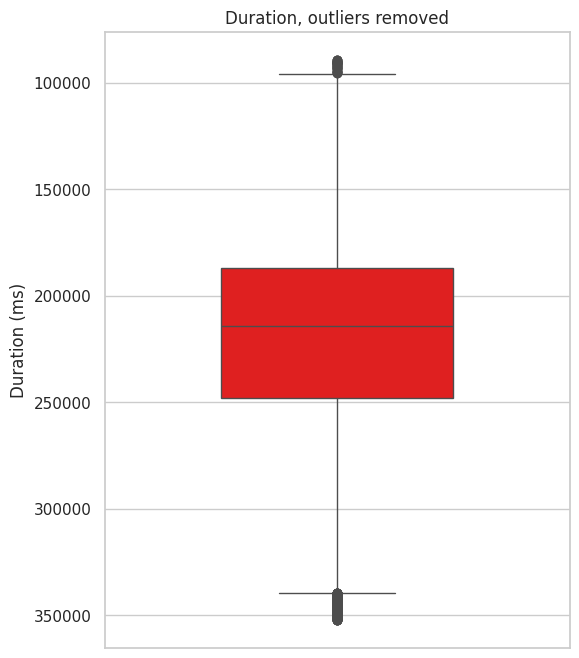

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Create a boxplot with outliers
plt.figure(figsize=(6, 8))
sns.boxplot(y='duration_ms', data=playlist_songs, color='red', width=0.5)
plt.title('Duration')
plt.ylabel('Duration (ms)')
plt.xlabel('')
plt.gca().invert_yaxis()  # Invert y-axis to have longer durations at the top
plt.show()

# Identify and remove outliers
q1 = playlist_songs['duration_ms'].quantile(0.25)
q3 = playlist_songs['duration_ms'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
playlist_songs_no_outliers = playlist_songs[(playlist_songs['duration_ms'] >= lower_bound) & (playlist_songs['duration_ms'] <= upper_bound)]

# Create a boxplot without outliers
plt.figure(figsize=(6, 8))
sns.boxplot(y='duration_ms', data=playlist_songs_no_outliers, color='red', width=0.5)
plt.title('Duration, outliers removed')
plt.ylabel('Duration (ms)')
plt.xlabel('')
plt.gca().invert_yaxis()  # Invert y-axis to have longer durations at the top
plt.show()


#Correlation Between Features


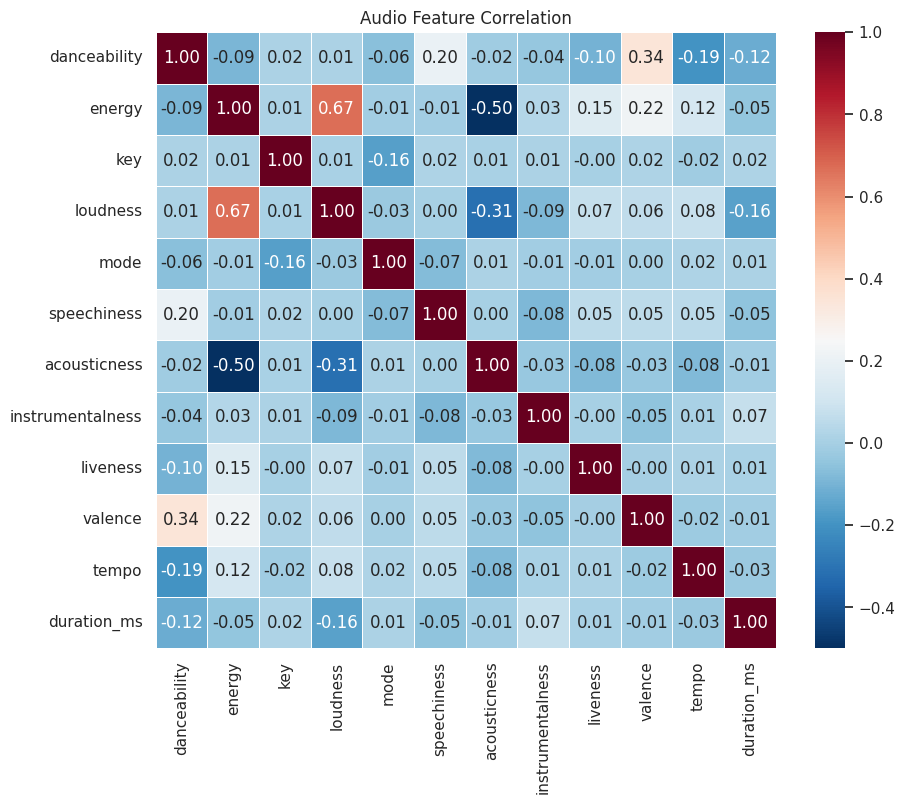

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Define function to remove outliers
def remove_outliers(df, column, coef=4):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - coef * iqr
    upper_bound = q3 + coef * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from the selected features
playlist_songs_no_outliers = playlist_songs.copy()
for feature in feature_names:
    playlist_songs_no_outliers = remove_outliers(playlist_songs_no_outliers, feature)

# Calculate the correlation matrix
correlation_matrix = playlist_songs_no_outliers[feature_names].corr()

# Create the correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=0.5)
plt.title('Audio Feature Correlation')
plt.show()

In [ ]:
# Extract feature names, excluding 'loudness' (assuming it's the 15th column)
feature_names_reduced = playlist_songs.columns[[11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22]].tolist()

# Print the reduced feature names to verify
print("Reduced feature names:", feature_names_reduced)

Reduced feature names: ['danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


## Correlation within genres

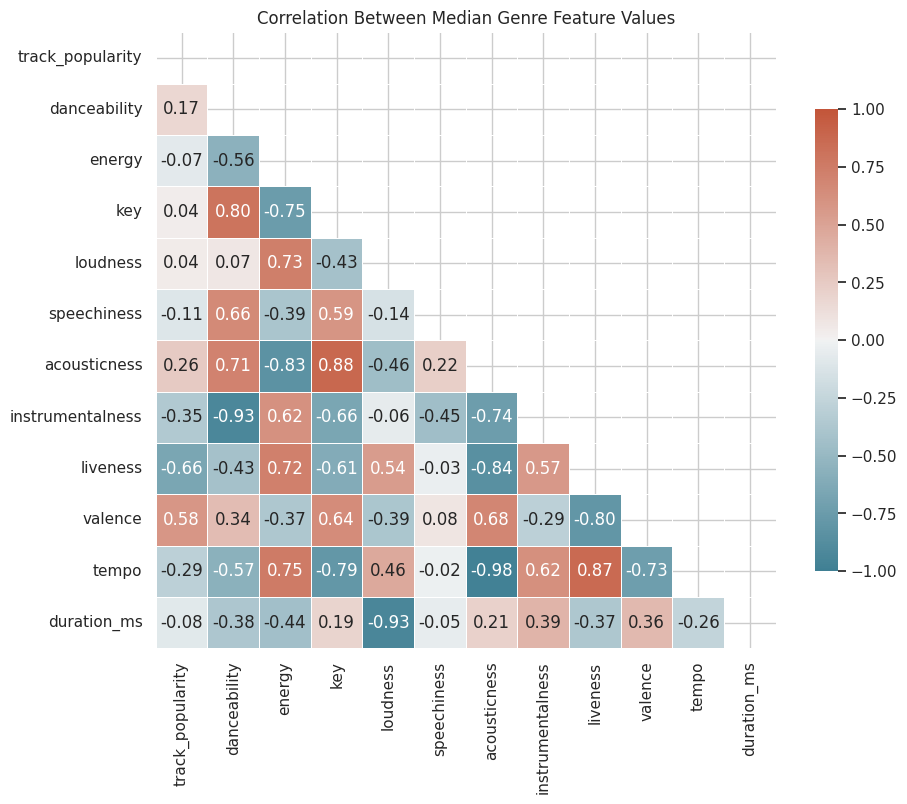

In [ ]:
# Assuming playlist_songs_no_outliers is already loaded as a DataFrame

# Group by genre and calculate the median of numeric features
avg_genre_matrix = (
    playlist_songs_no_outliers
    .groupby('playlist_genre')
    .median(numeric_only=True)
    .reset_index()
)

# Extract the genres
genres = avg_genre_matrix['playlist_genre']

# Select numeric features and exclude 'mode'
features = avg_genre_matrix.drop(columns=['playlist_genre', 'mode'])

from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Calculate the correlation matrix of the scaled median values
avg_genre_cor = np.corrcoef(scaled_features, rowvar=False)

# Create a DataFrame for the correlation matrix with genres as labels
avg_genre_cor_df = pd.DataFrame(avg_genre_cor, columns=features.columns, index=features.columns)

# Print the correlation matrix
feature_names_reduced = [col for col in avg_genre_matrix.columns if col not in ['playlist_genre', 'mode']]

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    avg_genre_cor_df,
    annot=True,
    fmt='.2f',
    cmap=sns.diverging_palette(220, 20, as_cmap=True),
    vmax=1, vmin=-1,
    linewidths=0.5,
    cbar_kws={"shrink": .75},
    mask=np.triu(np.ones_like(avg_genre_cor_df, dtype=bool))  # Mask upper triangle
)
plt.title('Correlation Between Median Genre Feature Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal
plt.show()

## Preparing the data for training

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Skala fitur numerik
playlist_songs_scaled = playlist_songs_no_outliers.copy()
numeric_features = playlist_songs_no_outliers.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
playlist_songs_scaled[numeric_features] = scaler.fit_transform(playlist_songs_no_outliers[numeric_features])

# Set seed untuk reproduktibilitas
np.random.seed(1234)

# Pisahkan data menjadi training dan testing sets
training_songs = np.random.choice(playlist_songs_scaled.index, size=int(len(playlist_songs_scaled) * 0.80), replace=False)
train_set = playlist_songs_scaled.loc[training_songs, ['playlist_genre'] + feature_names_reduced]
test_set = playlist_songs_scaled.drop(training_songs).loc[:, ['playlist_genre'] + feature_names_reduced]

# Pisahkan fitur dan respon
train_resp = train_set.pop('playlist_genre')
test_resp = test_set.pop('playlist_genre')

# Konversi ke DataFrames (jika diperlukan)
train_set = pd.DataFrame(train_set, columns=feature_names_reduced)
test_set = pd.DataFrame(test_set, columns=feature_names_reduced)

# Optional: Konversi respon ke DataFrame
train_resp = pd.DataFrame(train_resp, columns=['playlist_genre'])
test_resp = pd.DataFrame(test_resp, columns=['playlist_genre'])

## Modeling (Decision Tree)

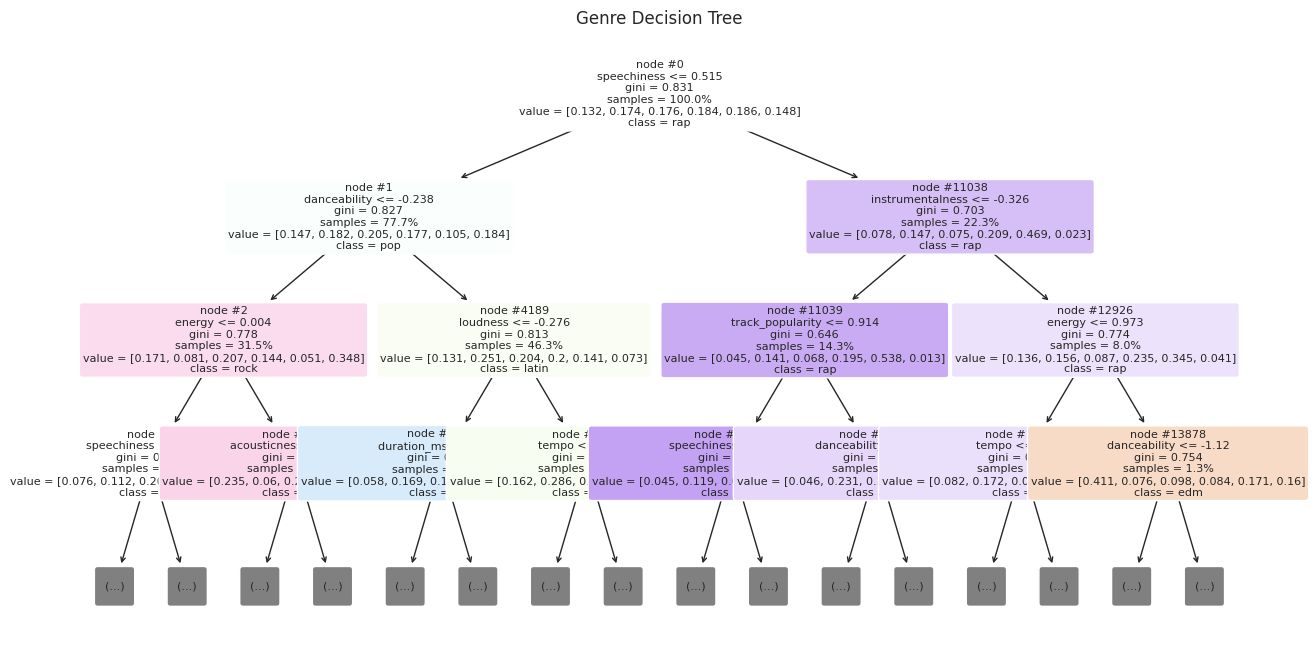

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib
import matplotlib.pyplot as plt

# Assuming train_set and train_resp are already defined
# If not, you need to define them appropriately

# Set seed for reproducibility
np.random.seed(1111)

# Train the decision tree model
model_dt = DecisionTreeClassifier(random_state=1111)
model_dt.fit(train_set, train_resp)

# Define color palette
colors = {
    'edm': "#490B32",
    'latin': "#9A031E",
    'pop': '#FB8B24',
    'r&b': "#0F4C5C",
    'rap': "#5DA9E9",
    'rock': '#66717E'
}

# Get color for each node
def get_box_colors(clf, colors, class_names):
    box_colors = []
    for node in range(clf.tree_.node_count):
        if clf.tree_.children_left[node] == clf.tree_.children_right[node]:  # leaf node
            class_idx = np.argmax(clf.tree_.value[node])
            class_name = class_names[class_idx]
            box_colors.append(colors.get(class_name, 'white'))
        else:
            box_colors.append('white')
    return box_colors

box_colors = get_box_colors(model_dt, colors, model_dt.classes_)

# Plot the decision tree
plt.figure(figsize=(15, 8))
plot_tree(model_dt,
          feature_names=feature_names_reduced,
          class_names=model_dt.classes_,
          filled=True,
          rounded=True,
          max_depth=3,
          fontsize=8,
          proportion=True,
          node_ids=True)

# Apply colors to nodes
ax = plt.gca()
for idx, node in enumerate(ax.findobj(matplotlib.patches.FancyBboxPatch)):
    node.set_facecolor(box_colors[idx])

plt.title('Genre Decision Tree')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Prediksi menggunakan model decision tree
predict_dt = model_dt.predict_proba(test_set)

# Mendapatkan indeks dari probabilitas maksimum
max_id = predict_dt.argmax(axis=1)

# Mengonversi indeks ke label
pred = model_dt.classes_[max_id]

# Membuat DataFrame untuk membandingkan nilai sebenarnya dan nilai prediksi
compare_dt = pd.DataFrame({
    'true_value': test_resp.values.flatten(),  # Konversi Series ke array 1D
    'predicted_value': pred,
    'model': 'decision_tree'
})

# Fungsi untuk menghitung akurasi model
def model_accuracy_calc(df, model_name):
    df['match'] = df['true_value'] == df['predicted_value']
    accuracy = df['match'].value_counts(normalize=True)
    return pd.DataFrame({'accuracy': [accuracy.get(True, 0)], 'model': [model_name]})

# Menghitung akurasi untuk model decision tree
accuracy_dt = model_accuracy_calc(compare_dt, 'decision_tree')

print(accuracy_dt)


   accuracy          model
0   0.40884  decision_tree


## Random Forest Classifier

In [ ]:
df = playlist_songs

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
y = df['playlist_genre']
X = df.drop(columns=['track_id','track_name','track_artist','track_popularity','track_album_id','track_album_name',
            'track_album_release_date','playlist_name','playlist_id','playlist_genre','playlist_subgenre'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to categorical features if needed
le = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column])

# Encode the target variable if needed
if y.dtype == 'object':
    y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

model_rf = RandomForestClassifier(random_state=100)

model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [ ]:
y_pred = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.5550253807106599
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.69      0.67      1811
           1       0.52      0.41      0.46      1545
           2       0.37      0.33      0.35      1623
           3       0.46      0.46      0.46      1617
           4       0.60      0.66      0.63      1783
           5       0.67      0.77      0.72      1471

    accuracy                           0.56      9850
   macro avg       0.54      0.55      0.55      9850
weighted avg       0.55      0.56      0.55      9850

Confusion Matrix:
[[1244   80  262   61  107   57]
 [ 158  634  249  198  241   65]
 [ 308  201  531  236  111  236]
 [  60  146  196  746  320  149]
 [  92  145   73  244 1182   47]
 [  40   23  127  130   21 1130]]


## Gradient boosting with XGBoost

In [ ]:
model_xgb = xgb.XGBClassifier(random_state=100, use_label_encoder=False)

model_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Make predictions
y_pred = model_xgb.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_xgb}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.5536040609137056
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.68      1811
           1       0.47      0.39      0.43      1545
           2       0.38      0.38      0.38      1623
           3       0.46      0.45      0.45      1617
           4       0.60      0.65      0.62      1783
           5       0.68      0.75      0.71      1471

    accuracy                           0.55      9850
   macro avg       0.55      0.55      0.55      9850
weighted avg       0.55      0.55      0.55      9850

Confusion Matrix:
[[1254   96  256   59  101   45]
 [ 155  608  266  217  231   68]
 [ 280  207  609  200  101  226]
 [  48  177  218  722  319  133]
 [  82  171  100  231 1160   39]
 [  35   37  149  130   20 1100]]


## Feature Importance

Feature: 0, Score: 0.07171
Feature: 1, Score: 0.11244
Feature: 2, Score: 0.09342
Feature: 3, Score: 0.03352
Feature: 4, Score: 0.08520
Feature: 5, Score: 0.11655
Feature: 6, Score: 0.08215
Feature: 7, Score: 0.04707
Feature: 8, Score: 0.06041
Feature: 9, Score: 0.08998
Feature: 10, Score: 0.11947
Feature: 11, Score: 0.08807


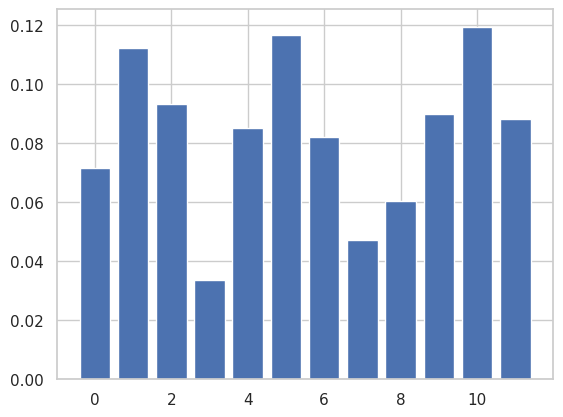

In [ ]:
# Decision tree feature importance
dt_importance = model_dt.feature_importances_

# summarize feature importance
for i,v in enumerate(dt_importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(dt_importance))], dt_importance)
plt.show()

Feature: tempo, Score: 0.11947
Feature: speechiness, Score: 0.11655
Feature: energy, Score: 0.11244
Feature: key, Score: 0.09342
Feature: valence, Score: 0.08998
Feature: duration_ms, Score: 0.08807
Feature: mode, Score: 0.08520
Feature: acousticness, Score: 0.08215
Feature: danceability, Score: 0.07171
Feature: liveness, Score: 0.06041
Feature: instrumentalness, Score: 0.04707
Feature: loudness, Score: 0.03352


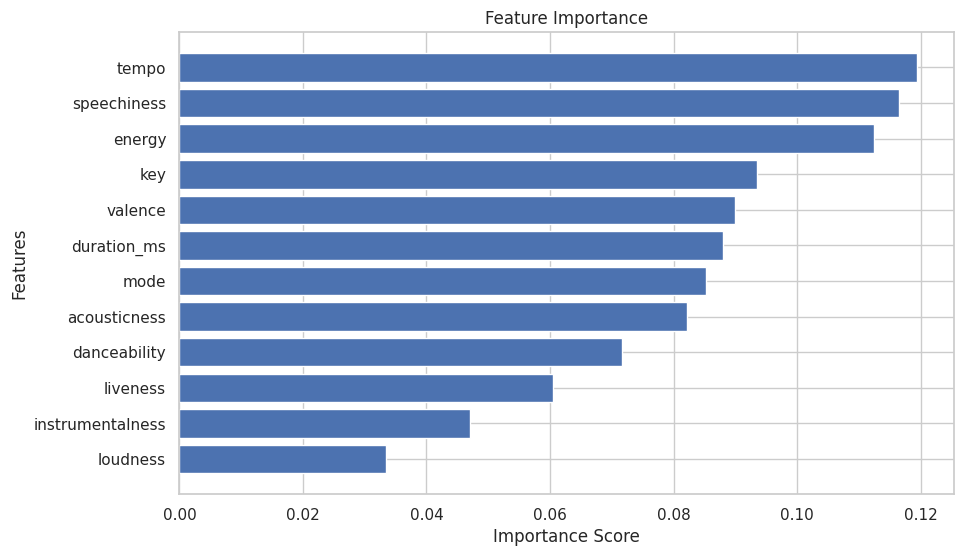

In [ ]:
# Extract feature importance scores
dt_importance = model_dt.feature_importances_

# Get the feature names
feature_names = X.columns

# Combine feature names with their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': dt_importance})

# Sort the DataFrame by importance scores
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature names and their importance scores
for index, row in feature_importance_df.iterrows():
    print(f"Feature: {row['Feature']}, Score: {row['Importance']:.5f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

## Accuracy Between Model

In [ ]:
accuracy_results = {
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_dt, accuracy_rf, accuracy_xgb]
}

accuracy_df = pd.DataFrame(accuracy_results)
accuracy_df

,Model,Accuracy
0,Decision Tree,accuracy model 0 0.40884 decisi...
1,Random Forest,0.555025
2,XGBoost,0.553604
